### Anayzing Stock Time Series Data

In [5]:
import pandas as pd
import yfinance as yf

ticker = 'ibm'
start = '2010-8-31'
end = '2020-8-31'

stock_data = yf.download(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

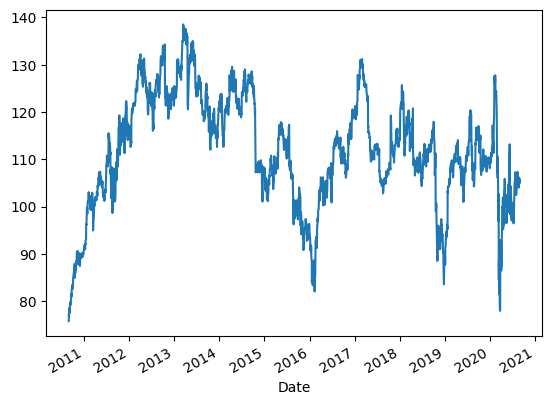

In [6]:
# View Pricing Trend
stock_data["Adj Close"].plot()

# Looks to be a General Upward Trend

<Axes: ylabel='Frequency'>

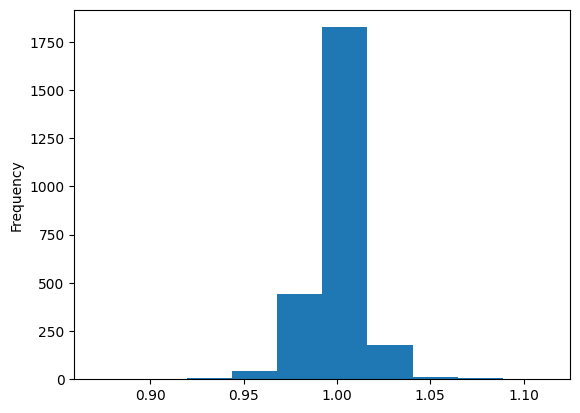

In [9]:
# Calculate Returns
stock_data["return"] = stock_data["Adj Close"]/stock_data["Adj Close"].shift()
stock_data.dropna(inplace=True)

# Check For Normality
stock_data["return"].plot.hist()

# Returns Appears to be Skewed

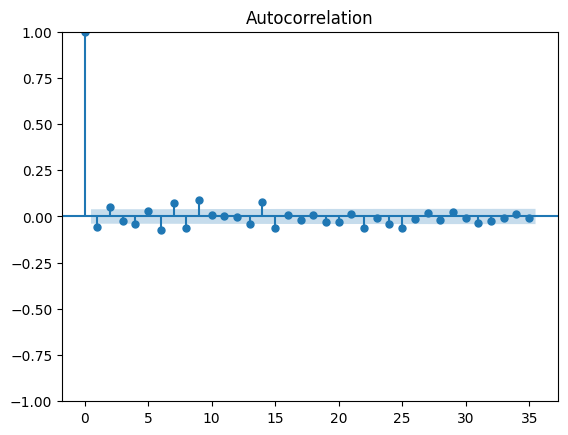

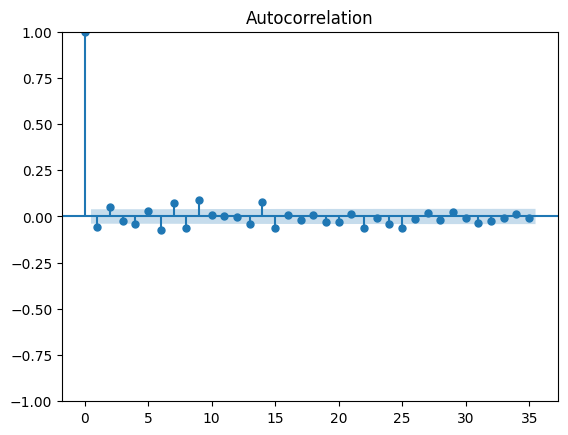

In [10]:
# Check Autocorrelation of the Returns Data
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stock_data["return"])

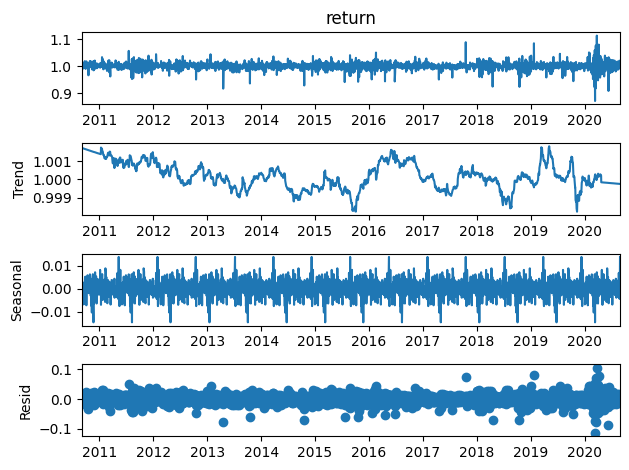

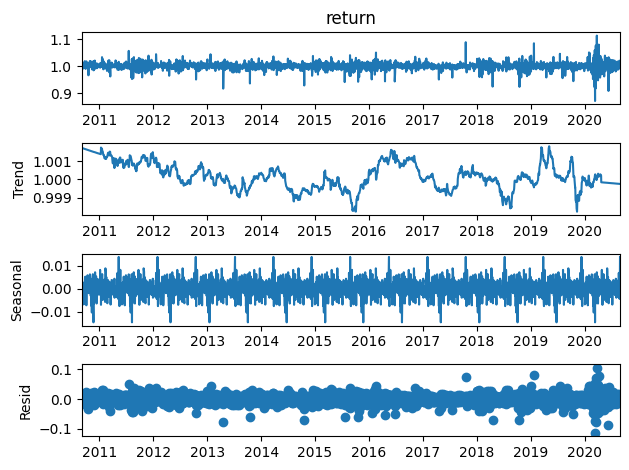

In [13]:
# Decomposing Time Series Data
from statsmodels.tsa.seasonal import seasonal_decompose
# The timestamp has to be set as the index of the dataframe df
decomp = seasonal_decompose(stock_data["return"],
                            model = 'additive',
                            period = 180,
                            extrapolate_trend = 'freq'
                           )
decomp.plot()